<a id='top'></a>

# Data Engineering Metling of Matched FBref and TransferMarkt Data for Waffle Chart Visualisation and Radars
##### Notebook to engineer matched data scraped from [TransferMarkt](https://www.transfermarkt.co.uk/) using the [Tyrone Mings web scraper](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://twitter.com/FC_rstats) and [StatsBomb](https://statsbomb.com/)  data provided by [FBref](https://fbref.com/en/) using a [Python webscraper](https://github.com/parth1902/Scrape-FBref-data) by [parth1902](https://github.com/parth1902).


### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 10/01/2020<br>
Notebook last updated: 10/01/2020

![title](../../img/fbref-logo-banner.png)

![title](../../img/stats-bomb-logo.png)

![title](../../img/transfermarkt-logo-banner.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook engineers previously scraped data from [TransferMarkt](https://www.transfermarkt.co.uk/) using the [FCrSTATS](https://twitter.com/FC_rstats) [Tyrone Ming](https://github.com/FCrSTATS/tyrone_mings) webscraper and manipulates this landed data as DataFrames using [pandas](http://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) for visualisation.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Flatten lists
from functools import reduce

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Currency Convert
from forex_python.converter import CurrencyRates

# APIs
from tyrone_mings import * 

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref_tm = os.path.join(base_dir, 'data', 'tm')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
data_dir_fbref_tm = os.path.join(base_dir, 'data', 'fbref-tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Notebook Settings

In [5]:
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook engineered data scraped from [TransferMarkt](https://www.transfermarkt.co.uk/) and FBref using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

The data of player values produced in this notebook is exported to CSV and used to create Age Profile visualisation in Tableau. See example [here](https://twitter.com/NdyStats/status/1343809317107986438).

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>
Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. Data Dictionaries</a>
The [TransferMarkt](https://www.transfermarkt.co.uk/) dataset has six features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `position_number`    | object     |
| `position_description`    | object     |
| `name`    | object     |
| `dob`    | object     |
| `nationality`    | object     |
| `value`    | object     |

### <a id='#section3.3'>3.3. Import CSV as pandas DataFrame</a>

In [6]:
# Import DataFrame as a CSV file
#df_fbref_tm = pd.read_csv(data_dir_fbref_tm + '/fbref_tm_big5_combined_latest.csv')
df_fbref_tm = pd.read_csv(data_dir + '/export/fbref_tm_big5_combined_latest.csv')
df_fbref_tm = df_fbref_tm.sort_values(by=['market_value_pounds', 'player', 'Season'], ascending=[False, True, False])

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (221,224) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### <a id='#section3.4'>3.4. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [7]:
# Display the first 5 rows of the raw DataFrame, df_fbref_tm
df_fbref_tm.head()

,tm_id,Season,player,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,league_name,league_country,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,team_elo,age_during_season,play_style_davies,percentage_left_footed_davies,percentage_right_footed_davies,footedness_davies,DAVIES,DAVIES_p90,xGoalsAdded_davies,xGoalsAddedAbovePlayStyle_davies,xGoalsAddedPer90_davies,Salary($)_davies,xSalary($)_davies,CurrentMarketValue(€)_davies,xMarketValue(€)_davies,xGAM_davies
278,342229.0,20/21,Kylian Mbappé,22.0,22.0,19.0,1998-12-20,Paris,France,France,FRA,NaN,Paris S-G,Ligue 1,France,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,178.0,right,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,Relatives,13.0,9.0,815.0,12.0,4.0,4.0,4.0,1.0,0.0,1.33,0.44,1.77,0.88,1.33,11.6,8.6,2.2,1.28,0.24,1.53,0.95,1.19,9.1,38.0,20.0,1.0,52.6,4.20,2.21,0.21,0.40,0.23,0.4,-0.6,310.0,388.0,79.9,4139.0,695.0,193.0,230.

In [8]:
# Display the last 5 rows of the raw DataFrame, df_fbref_tm
df_fbref_tm.tail()

,tm_id,Season,player,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,league_name,league_country,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,team_elo,age_during_season,play_style_davies,percentage_left_footed_davies,percentage_right_footed_davies,footedness_davies,DAVIES,DAVIES_p90,xGoalsAdded_davies,xGoalsAddedAbovePlayStyle_davies,xGoalsAddedPer90_davies,Salary($)_davies,xSalary($)_davies,CurrentMarketValue(€)_davies,xMarketValue(€)_davies,xGAM_davies
11657,NaN,18/19,Łukasz Skorupski,NaN,NaN,NaN,NaN,NaN,NaN,Poland,POL,NaN,Bologna,Serie A,Italy,NaN,GK,NaN,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [9]:
df_fbref_tm[df_fbref_tm['player'] == 'Raheem Sterling']

,tm_id,Season,player,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,league_name,league_country,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,team_elo,age_during_season,play_style_davies,percentage_left_footed_davies,percentage_right_footed_davies,footedness_davies,DAVIES,DAVIES_p90,xGoalsAdded_davies,xGoalsAddedAbovePlayStyle_davies,xGoalsAddedPer90_davies,Salary($)_davies,xSalary($)_davies,CurrentMarketValue(€)_davies,xMarketValue(€)_davies,xGAM_davies
2159,134425.0,20/21,Raheem Sterling,26.0,26.0,20.0,1994-12-08,Kingston,Jamaica,England,ENG,Jamaica,Manchester City,Premier League,England,LW,FW,attack - Left Winger,Forward,Outfielder,170.0,right,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,Colossal Sports Management,12.0,11.0,999.0,4.0,2.0,0.0,0.0,1.0,0.0,0.36,0.18,0.54,0.36,0.54,3.6,3.6,1.5,0.33,0.14,0.46,0.33,0.46,11.1,25.0,12.0,1.0,48.0,2.25,1.08,0.16,0.33,0.14,0.4,0.4,342.0,4

In [10]:
# Print the shape of the raw DataFrame, df_fbref_tm
print(df_fbref_tm.shape)

(11662, 235)


In [11]:
# Print the column names of the raw DataFrame, df_fbref_tm
print(df_fbref_tm.columns)

Index(['tm_id', 'Season', 'player', 'age', 'age_tm', 'age_when_joining', 'dob',
       'pob', 'cob', 'nationality',
       ...
       'DAVIES', 'DAVIES_p90', 'xGoalsAdded_davies',
       'xGoalsAddedAbovePlayStyle_davies', 'xGoalsAddedPer90_davies',
       'Salary($)_davies', 'xSalary($)_davies', 'CurrentMarketValue(€)_davies',
       'xMarketValue(€)_davies', 'xGAM_davies'],
      dtype='object', length=235)


The dataset has thirteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [12]:
# Data types of the features of the raw DataFrame, df_fbref_tm
df_fbref_tm.dtypes

tm_id                           float64
Season                           object
player                           object
age                             float64
age_tm                          float64
                                 ...   
Salary($)_davies                float64
xSalary($)_davies               float64
CurrentMarketValue(€)_davies    float64
xMarketValue(€)_davies          float64
xGAM_davies                     float64
Length: 235, dtype: object

All thirteen of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [13]:
# Info for the raw DataFrame, df_fbref_tm
df_fbref_tm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11662 entries, 278 to 11660
Columns: 235 entries, tm_id to xGAM_davies
dtypes: float64(209), object(26)
memory usage: 21.0+ MB


In [14]:
# Description of the raw DataFrame, df_fbref_tm, showing some summary statistics for each numberical column in the DataFrame
df_fbref_tm.describe()

,tm_id,age,age_tm,age_when_joining,height,market_value_euros,market_value_pounds,years_since_joining,years_until_contract_expiry,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,team_elo,age_during_season,percentage_left_footed_davies,percentage_right_footed_davies,DAVIES,DAVIES_p90,xGoalsAdded_davies,xGoalsAddedAbovePlayStyle_davies,xGoalsAddedPer90_davies,Salary($)_davies,xSalary($)_davies,CurrentMarketValue(€)_davies,xMarketValue(€)_davies,xGAM_davies
count,8961.000000,8961.000000,8961.000000,8961.000000,8960.000000,8.961000e+03,8.961000e+03,8961.000000,8813.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.00000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10893.000000,10

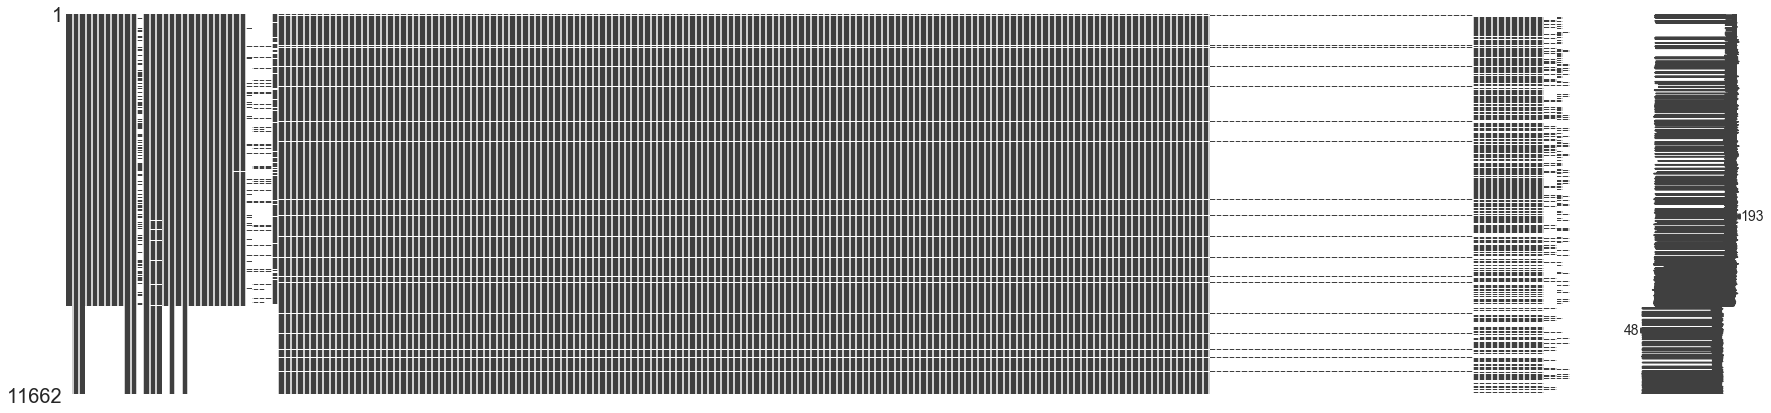

In [15]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_tm
msno.matrix(df_fbref_tm, figsize = (30, 7))

In [16]:
# Counts of missing values
tm_bio_null_value_stats = df_fbref_tm.isnull().sum(axis=0)
tm_bio_null_value_stats[tm_bio_null_value_stats != 0]

tm_id                            2701
age                              2701
age_tm                           2701
age_when_joining                 2701
dob                              2701
                                ...  
Salary($)_davies                 8911
xSalary($)_davies                8911
CurrentMarketValue(€)_davies     7451
xMarketValue(€)_davies           9879
xGAM_davies                     11662
Length: 230, dtype: int64

The visualisation shows us very quickly that there a few missing values in most of the columns, but the dataset is ready for us.

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Assign DataFrames to New Age Profile DataFrame</a>

In [17]:
# Assign Raw DataFrames to new Engineered DataFrames
df_fbref_tm_waffle = df_fbref_tm

### <a id='#section4.2'>4.2. Select Columns of Interest</a>

In [18]:
df_fbref_tm_waffle.head()

,tm_id,Season,player,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,league_name,league_country,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,team_elo,age_during_season,play_style_davies,percentage_left_footed_davies,percentage_right_footed_davies,footedness_davies,DAVIES,DAVIES_p90,xGoalsAdded_davies,xGoalsAddedAbovePlayStyle_davies,xGoalsAddedPer90_davies,Salary($)_davies,xSalary($)_davies,CurrentMarketValue(€)_davies,xMarketValue(€)_davies,xGAM_davies
278,342229.0,20/21,Kylian Mbappé,22.0,22.0,19.0,1998-12-20,Paris,France,France,FRA,NaN,Paris S-G,Ligue 1,France,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,178.0,right,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,Relatives,13.0,9.0,815.0,12.0,4.0,4.0,4.0,1.0,0.0,1.33,0.44,1.77,0.88,1.33,11.6,8.6,2.2,1.28,0.24,1.53,0.95,1.19,9.1,38.0,20.0,1.0,52.6,4.20,2.21,0.21,0.40,0.23,0.4,-0.6,310.0,388.0,79.9,4139.0,695.0,193.0,230.

In [19]:
sorted(df_fbref_tm_waffle.columns)

['CurrentMarketValue(€)_davies',
 'DAVIES',
 'DAVIES_p90',
 'Salary($)_davies',
 'Season',
 'aerials_lost',
 'aerials_won',
 'aerials_won_pct',
 'age',
 'age_during_season',
 'age_tm',
 'age_when_joining',
 'assisted_shots',
 'assists',
 'assists_per90',
 'avg_distance_def_actions_gk',
 'ball_recoveries',
 'blocked_passes',
 'blocked_shots',
 'blocked_shots_saves',
 'blocks',
 'cards_red',
 'cards_yellow',
 'cards_yellow_red',
 'carries',
 'carry_distance',
 'carry_progressive_distance',
 'clean_sheets',
 'clean_sheets_pct',
 'clearances',
 'club',
 'cob',
 'contract_expires',
 'contract_option',
 'corner_kick_goals_against_gk',
 'corner_kicks',
 'corner_kicks_in',
 'corner_kicks_out',
 'corner_kicks_straight',
 'crosses',
 'crosses_gk',
 'crosses_into_penalty_area',
 'crosses_stopped_gk',
 'crosses_stopped_pct_gk',
 'def_actions_outside_pen_area_gk',
 'def_actions_outside_pen_area_per90_gk',
 'dispossessed',
 'dob',
 'draws_gk',
 'dribble_tackles',
 'dribble_tackles_pct',
 'dribbled_p

In [20]:
# Will pivot corners, crosses, indirect freekicks, open play passes (passes_into_penalty_area)

# Select columns of interest
cols = ['player',
        'Season',
        'age',
        'age_tm',
        'age_when_joining',
        'dob',
        'cob',
        'nationality',
        'club',
        'league_name',
        'position_code',
        'position_fbref',
        'position_TM',
        'position_grouped',
        'outfielder_goalkeeper',
        'market_value_euros',
        'market_value_pounds',
        'joined',
        'years_since_joining',
        'contract_expires',
        'years_until_contract_expiry',
        'contract_option',
        'on_loan_from',
        'on_loan_from_country',
        'loan_contract_expiry',
        'games',
        'games_starts',
        'minutes',
        'corner_kicks',
        'crosses',
        'shots_free_kicks',
        'passes_into_final_third'
        ]

df_fbref_tm_waffle_select = df_fbref_tm_waffle[cols]

In [21]:
df_fbref_tm_waffle_select.head()

,player,Season,age,age_tm,age_when_joining,dob,cob,nationality,club,league_name,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,games,games_starts,minutes,corner_kicks,crosses,shots_free_kicks,passes_into_final_third
278,Kylian Mbappé,20/21,22.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,13.0,9.0,815.0,6.0,23.0,1.0,12.0
15,Kylian Mbappé,19/20,20.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,20.0,17.0,1513.0,14.0,67.0,0.0,23.0
1,Kylian Mbappé,18/19,19.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,29.0,24.0,2343.0,6.0,48.0,1.0,47.0
25,Kylian Mbappé,17/18,18.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,27.0,24.0,2095.0,4.0,62.0,0.0,36.0
26,Kylian Mbappé,17/18,18.0,22.0,19.0,1998-12-20,France,France,Monaco,Ligue 1,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,1.0,1.0,74.0,0.0,5.0,0.0,1.0


### <a id='#section4.3'>4.3. Melt DataFrame for Desired Playing Metrics</a>
Metrics to melt include: corners, crosses, indirect freekicks, and open play passes.

In [22]:
# Melt DataFrame
df_fbref_tm_waffle_melt = pd.melt(df_fbref_tm_waffle_select,
                                  id_vars=['player',
                                           'Season',
                                           'age',
                                           'age_tm',
                                           'age_when_joining',
                                           'dob',
                                           'cob',
                                           'nationality',
                                           'club',
                                           'league_name',
                                           'position_code',
                                           'position_fbref',
                                           'position_TM',
                                           'position_grouped',
                                           'outfielder_goalkeeper',
                                           'market_value_euros',
                                           'market_value_pounds',
                                           'joined',
                                           'years_since_joining',
                                           'contract_expires',
                                           'years_until_contract_expiry',
                                           'contract_option',
                                           'on_loan_from',
                                           'on_loan_from_country',
                                           'loan_contract_expiry',
                                           'games',
                                           'games_starts',
                                           'minutes'
                                           ],
                                  var_name='attribute_name', 
                                  value_name='value')


# Sort DataFrame
df_fbref_tm_waffle_melt = df_fbref_tm_waffle_melt.sort_values(by=['market_value_pounds', 'player', 'Season'], ascending=[False, True, False])

In [23]:
df_fbref_tm_waffle_melt.head(20)

,player,Season,age,age_tm,age_when_joining,dob,cob,nationality,club,league_name,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,games,games_starts,minutes,attribute_name,value
0,Kylian Mbappé,20/21,22.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,13.0,9.0,815.0,corner_kicks,6.0
11662,Kylian Mbappé,20/21,22.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,13.0,9.0,815.0,crosses,23.0
23324,Kylian Mbappé,20/21,22.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,13.0,9.0,815.0,shots_free_kicks,1.0
34986,Kylian Mbappé,20/21,22.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,13.0,9.0,815.0,passes_into_final_third,12.0
1,Kylian Mbappé,19/20,20.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,20.0,17.0,1513.0,corner_kicks,14.0
11663,Kylian Mbappé,19/20,20.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,20.0,17.0,1513.0,crosses,67.0
23325,Kylian Mbappé,19/20,20.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,20.0,17.0,1513.0,shots_free_kicks,0.0
34987,Kylian Mbappé,19/20,20.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,20.0,17.0,1513.0,passes_into_final_third,23.0
2,Kylian Mbappé,18/19,19.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,29.0,24.0,2343.0,corner_kicks,6.0
11664,Kylian Mbappé,18/19,19.0,22.0,19.0,1998-12-20,France,France,Paris S-G,Ligue 1,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,29.0,24.0,2343.0,crosses,48.0


### <a id='#section4.4'>4.4. Exporting the Engineered DataFrames</a>

In [24]:
# Export DataFrame as a CSV file

## Export a copy to the 'archive' subfolder of the TM folder, including the date
df_fbref_tm_waffle_melt.to_csv(data_dir_fbref_tm + f'/archive/fbref_tm_big5_melt_last_updated_{today}.csv', index=None, header=True)

## Export another copy to the TM folder called 'latest' (can be overwritten)
df_fbref_tm_waffle_melt.to_csv(data_dir_fbref_tm + '/fbref_tm_big5_melt_latest.csv', index=None, header=True)

## Export a copy to the Export folder (can be overwritten)
df_fbref_tm_waffle_melt.to_csv(data_dir + '/export/fbref_tm_big5_melt_latest.csv', index=None, header=True)

Now we have a pandas DataFrames and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5).

## <a id='#section5'>5. Exploratory Data Analysis</a>
...

In [26]:
df_fbref_tm_waffle_melt[df_fbref_tm_waffle_melt['player'] == 'Kevin De Bruyne']

,player,Season,age,age_tm,age_when_joining,dob,cob,nationality,club,league_name,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,games,games_starts,minutes,attribute_name,value
13,Kevin De Bruyne,20/21,29.0,29.0,24.0,1991-06-28,Belgium,Belgium,Manchester City,Premier League,CAM,MF,midfield - Attacking Midfield,Midfielder,Outfielder,120000000.0,106800000.0,2015-08-30,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,12.0,11.0,1013.0,corner_kicks,43.0
11675,Kevin De Bruyne,20/21,29.0,29.0,24.0,1991-06-28,Belgium,Belgium,Manchester City,Premier League,CAM,MF,midfield - Attacking Midfield,Midfielder,Outfielder,120000000.0,106800000.0,2015-08-30,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,12.0,11.0,1013.0,crosses,34.0
23337,Kevin De Bruyne,20/21,29.0,29.0,24.0,1991-06-28,Belgium,Belgium,Manchester City,Premier League,CAM,MF,midfield - Attacking Midfield,Midfielder,Outfielder,120000000.0,106800000.0,2015-08-30,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,12.0,11.0,1013.0,shots_free_kicks,7.0
34999,Kevin De Bruyne,20/21,29.0,29.0,24.0,1991-06-28,Belgium,Belgium,Manchester City,Premier League,CAM,MF,midfield - Attacking Midfield,Midfielder,Outfielder,120000000.0,106800000.0,2015-08-30,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,12.0,11.0,1013.0,passes_into_final_third,54.0
14,Kevin De Bruyne,19/20,28.0,29.0,24.0,1991-06-28,Belgium,Belgium,Manchester City,Premier League,CAM,MF,midfield - Attacking Midfield,Midfielder,Outfielder,120000000.0,106800000.0,2015-08-30,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,35.0,32.0,2791.0,corner_kicks,177.0
11676,Kevin De Bruyne,19/20,28.0,29.0,24.0,1991-06-28,Belgium,Belgium,Manchester City,Premier League,CAM,MF,midfield - Attacking Midfield,Midfielder,Outfielder,120000000.0,106800000.0,2015-08-30,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,35.0,32.0,2791.0,crosses,143.0
23338,Kevin De Bruyne,19/20,28.0,29.0,24.0,1991-06-28,Belgium,Belgium,Manchester City,Premier League,CAM,MF,midfield - Attacking Midfield,Midfielder,Outfielder,120000000.0,106800000.0,2015-08-30,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,35.0,32.0,2791.0,shots_free_kicks,11.0
35000,Kevin De Bruyne,19/20,28.0,29.0,24.0,1991-06-28,Belgium,Belgium,Manchester City,Premier League,CAM,MF,midfield - Attacking Midfield,Midfielder,Outfielder,120000000.0,106800000.0,2015-08-30,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,35.0,32.0,2791.0,passes_into_final_third,175.0
15,Kevin De Bruyne,18/19,27.0,29.0,24.0,1991-06-28,Belgium,Belgium,Manchester City,Premier League,CAM,MF,midfield - Attacking Midfield,Midfielder,Outfielder,120000000.0,106800000.0,2015-08-30,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,19.0,11.0,975.0,corner_kicks,50.0
11677,Kevin De Bruyne,18/19,27.0,29.0,24.0,1991-06-28,Belgium,Belgium,Manchester City,Premier League,CAM,MF,midfield - Attacking Midfield,Midfielder,Outfielder,120000000.0,106800000.0,2015-08-30,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,19.0,11.0,975.0,crosses,47.0


In [25]:
df_fbref_tm_waffle_melt[df_fbref_tm_waffle_melt['player'] == 'Raheem Sterling']

,player,Season,age,age_tm,age_when_joining,dob,cob,nationality,club,league_name,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,games,games_starts,minutes,attribute_name,value
25,Raheem Sterling,20/21,26.0,26.0,20.0,1994-12-08,Jamaica,England,Manchester City,Premier League,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,12.0,11.0,999.0,corner_kicks,2.0
11687,Raheem Sterling,20/21,26.0,26.0,20.0,1994-12-08,Jamaica,England,Manchester City,Premier League,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,12.0,11.0,999.0,crosses,12.0
23349,Raheem Sterling,20/21,26.0,26.0,20.0,1994-12-08,Jamaica,England,Manchester City,Premier League,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,12.0,11.0,999.0,shots_free_kicks,1.0
35011,Raheem Sterling,20/21,26.0,26.0,20.0,1994-12-08,Jamaica,England,Manchester City,Premier League,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,12.0,11.0,999.0,passes_into_final_third,23.0
26,Raheem Sterling,19/20,24.0,26.0,20.0,1994-12-08,Jamaica,England,Manchester City,Premier League,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,33.0,30.0,2651.0,corner_kicks,1.0
11688,Raheem Sterling,19/20,24.0,26.0,20.0,1994-12-08,Jamaica,England,Manchester City,Premier League,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,33.0,30.0,2651.0,crosses,63.0
23350,Raheem Sterling,19/20,24.0,26.0,20.0,1994-12-08,Jamaica,England,Manchester City,Premier League,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,33.0,30.0,2651.0,shots_free_kicks,1.0
35012,Raheem Sterling,19/20,24.0,26.0,20.0,1994-12-08,Jamaica,England,Manchester City,Premier League,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,33.0,30.0,2651.0,passes_into_final_third,31.0
27,Raheem Sterling,18/19,23.0,26.0,20.0,1994-12-08,Jamaica,England,Manchester City,Premier League,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,34.0,31.0,2771.0,corner_kicks,19.0
11689,Raheem Sterling,18/19,23.0,26.0,20.0,1994-12-08,Jamaica,England,Manchester City,Premier League,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,34.0,31.0,2771.0,crosses,90.0


## <a id='#section6'>6. Summary</a>
This notebook engineered matched data from FBref and [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames, to melt identified playing metrics for the creating of a waffle chart.

## <a id='#section7'>7. Next Steps</a>
...

## <a id='#section8'>8. References</a>

#### Data and Web Scraping
*    https://twitter.com/NdyStats/status/1343809317107986438
*    [tyrone_mings GitHub repository](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://github.com/FCrSTATS)
*    [Python Package Index (PyPI) tyrone-mings library](https://pypi.org/project/tyrone-mings/)
*    [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann.
*    [06/04/2020: BBC - Premier League squads 'drop £1.6bn in value'](https://www.bbc.co.uk/sport/football/52221463).

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)